# Ideia do Projeto Slot 4 - Wallmart

Case: Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.

# Sobre o Wallmart 
[Walmart, Inc.](https://pt.wikipedia.org/wiki/Walmart), é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.

# O Dataset

Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

Sobre o [Dataset do Wallmart](https://www.kaggle.com/yasserh/walmart-dataset)

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:

Variável | Descrição
--- | ---
Store | Número da Loja
Date | Semana de venda
Weekly_Sales | Venda naquela semana
Holiday_Flag | Flag se é ou não semana com feriado (1 – Holiday week 0 – Non-holiday week)
Temperature | Temperatuda do dia em ºF 
Fuel_Price | Preço do combustível na região da loja
CPI | Índice de preços ao consumidor 
Unemployment | Taxa de desemprego

Variável | Descrição
--- | ---
Holiday Events | Semanas
Super Bowl |  12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day | 10-Sep-10, 9-Sep-11, 7-Sep-12
Thanksgiving |  26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas |  31-Dec-10, 30-Dec-11, 28-Dec-12

# Perguntas importantes a serem respondidas

1. Qual o preço médio de venda semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

## **0.0 Bibliotecas utilizadas**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### 0.1 Funções auxiliares

In [2]:
def personal_settings():
    
    pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
personal_settings()

## **1.0 Descrição dos dados**

### 1.1 Importação dos dados

In [4]:
# Leitura Local
#df = pd.read_csv('Walmart.csv', parse_dates=['Date'])
#print(df.shape)
#df.head()

# Leitura Cloud
URL = "https://drive.google.com/file/d/1DvzVJYA187Vv4_0b0qJnpaheqV-1784j/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+URL.split("/")[-2]
df = pd.read_csv(path, parse_dates=['Date'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10448\700833101.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(path, parse_dates=['Date'])


In [5]:
# Verificar as cinco primeiras linhas
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11


In [6]:
# Verificar as cinco últimas linhas
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67
6434,45,2012-10-26,760281.43,0,58.85,3.88,192.31,8.67


### 1.2 Dimensão dos dados

In [7]:
print(df.shape[0], 'Linhas')
print(df.shape[1], 'Colunas')

6435 Linhas
8 Colunas


### 1.3 Tipos de dados

In [8]:
description = []

for i in df.columns:
    description.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=description, columns=['attributes', 'dtypes', 'nunique', 'sample'])

,attributes,dtypes,nunique,sample
0,Store,int64,45,"[17, 16]"
1,Date,datetime64[ns],143,"[2011-11-02T00:00:00.000000000, 2012-08-06T00:..."
2,Weekly_Sales,float64,6435,"[841889.08, 303043.02]"
3,Holiday_Flag,int64,2,"[0, 1]"
4,Temperature,float64,3528,"[77.78, 85.13]"
5,Fuel_Price,float64,892,"[3.963, 3.758]"
6,CPI,float64,2145,"[219.9746423, 197.4133259]"
7,Unemployment,float64,349,"[6.432, 6.403]"


### 1.4 Métricas estatísticas  inicias

In [9]:
#-- Análise estatística simplificada
df.describe(percentiles=[.25, 0.95,0.99,0.995])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
95%,43.00,2049178.51,1.00,87.66,4.03,221.93,12.19
99%,45.00,2404035.30,1.00,93.19,4.20,225.47,14.18
99.5%,45.00,2733137.77,1.00,95.61,4.29,225.96,14.31
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


## **2.0 Limpeza de dados**

### 2.1 Identificando valores ausentes

In [10]:
description = []
for i in df.columns:
    description.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

#se a soma de todos for 0 é um excelente resultado e a base não precisa ser tratada

,attributes,null,%null
0,Store,0,0
1,Date,0,0
2,Weekly_Sales,0,0
3,Holiday_Flag,0,0
4,Temperature,0,0
5,Fuel_Price,0,0
6,CPI,0,0
7,Unemployment,0,0


### 2.2 Identificando duplicadas

In [11]:
# verificar duplicados
df.duplicated().any()

False

In [12]:
# verificar missing values
df.isna().sum().any()

False

## **3.0 Análise exploratória**

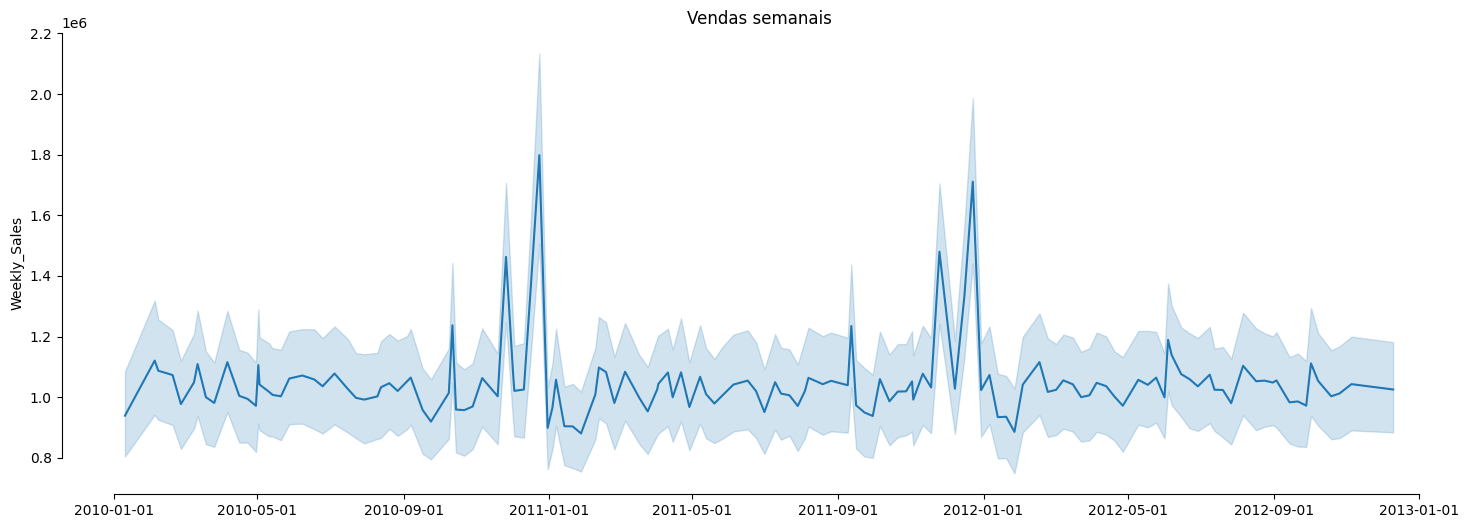

In [13]:
# Plotando uma relação de Tempo X Venda
plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas semanais')
plt.xlabel(None)
sns.despine(trim=True)
plt.show()

## **3.0 Visualizando os dados**

### 3.1 Preço médio de venda semanal (por loja)

In [14]:
df_store_total = df.groupby('Store')[['Weekly_Sales']].mean().sort_values('Weekly_Sales', ascending=False)
df_store_total.style.format('{:,.2f}')

,Weekly_Sales
Store,
20,"2,107,676.87"
4,"2,094,712.96"
14,"2,020,978.40"
13,"2,003,620.31"
2,"1,925,751.34"
10,"1,899,424.57"
27,"1,775,216.20"
6,"1,564,728.19"
1,"1,555,264.40"


### 3.2 Atributos de maior correlação com a quantidade de vendas

In [15]:
df.corr()['Weekly_Sales'].sort_values(ascending=False)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10448\1656806316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Weekly_Sales'].sort_values(ascending=False)


Weekly_Sales    1.00
Holiday_Flag    0.04
Fuel_Price      0.01
Temperature    -0.06
CPI            -0.07
Unemployment   -0.11
Store          -0.34
Name: Weekly_Sales, dtype: float64

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10448\2001597799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc = df.corr()


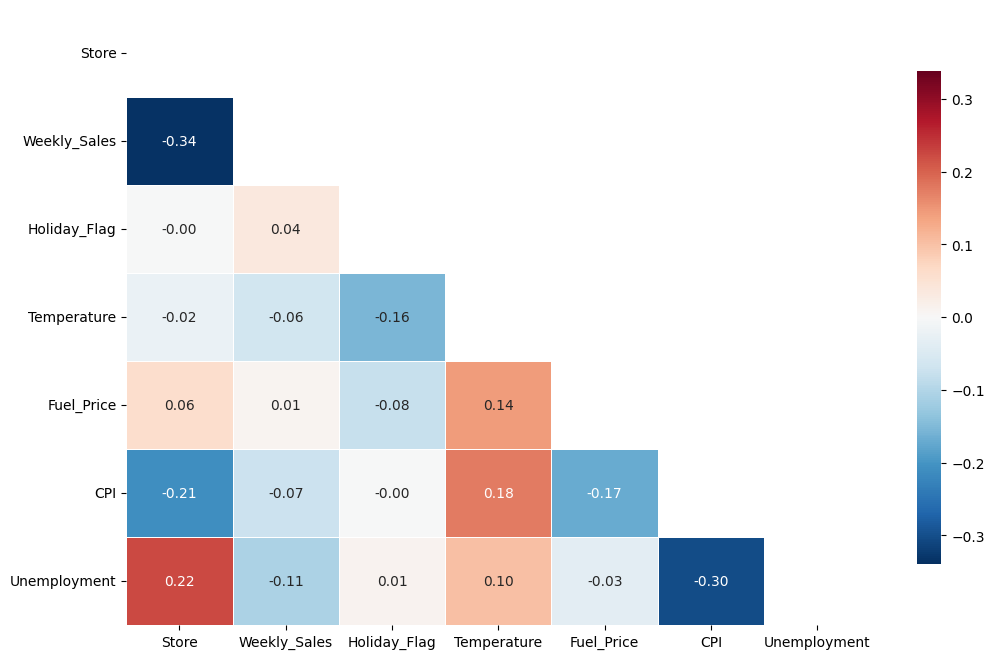

In [16]:
plt.figure(figsize=(12,8))
dfc = df.corr()

mask = np.zeros(dfc.shape).astype(bool)
mask[np.triu_indices_from(mask)] = True
lim = np.abs(np.triu(dfc, k=1)).max() * 1.01

sns.heatmap(dfc, mask=mask, center=0, vmin=-lim, vmax=lim, linewidths=.5, annot=True, fmt='.2f', cmap='RdBu_r', cbar_kws={'orientation':'vertical', 'shrink': .8})
plt.show()

### 3.3 Venda semanal acima da média (maior período acumulado)

In [17]:
df.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False).index[0]

20

In [18]:
# Id da loja que vendeu mais
target_store = df.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False).index[0]

# DF da loja que vendeu mais
df_target = df.query('Store==@target_store')

# Média da loja que vendeu mais
target_mean = df_target.Weekly_Sales.mean()

total_weeks = df_target.shape[0]
total_weeks_above_avg = df_target.Weekly_Sales.gt(target_mean).sum()
print(f'{total_weeks_above_avg} from {total_weeks} ({total_weeks_above_avg/total_weeks:.2%}) weeks above the mean.')

52 from 143 (36.36%) weeks above the mean.


### 3.4 Vendas máximas, mínimas e médias (incluindo feriados)

In [19]:
##definindo os feriados
holiday_dict = {
  'Super_Bowl':	['12-Feb-10', '11-Feb-11', '10-Feb-12'],
  'Labour_Day':	['10-Sep-10', '9-Sep-11', '7-Sep-12'],
  'Thanksgiving':	['26-Nov-10', '25-Nov-11', '23-Nov-12'],
  'Christmas':	['31-Dec-10', '30-Dec-11', '28-Dec-12']
}

holiday_dict_dt = {k: pd.to_datetime(v, format='%d-%b-%y') for k,v in holiday_dict.items()}

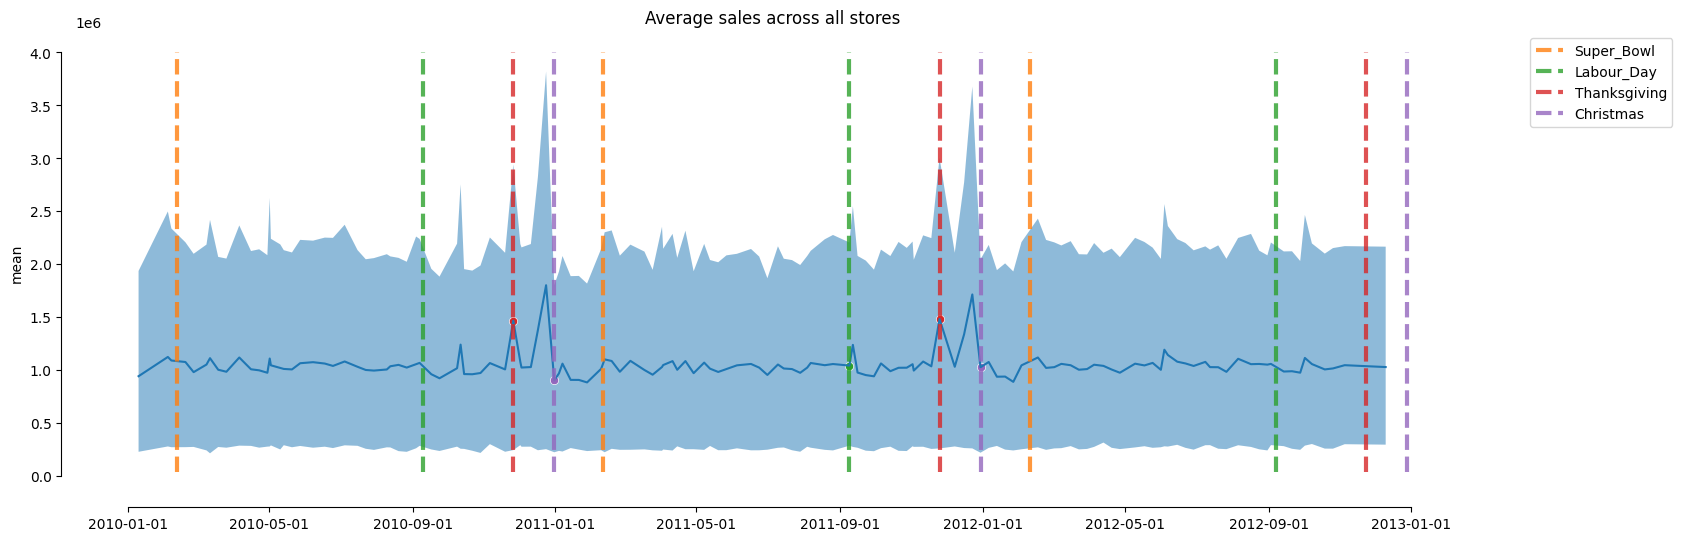

In [20]:
df_agg = df.groupby('Date')['Weekly_Sales'].agg(['min','mean','max'])

for holiday in holiday_dict_dt:
  df_agg[holiday] = df_agg.index.isin(holiday_dict_dt[holiday])

fig,ax = plt.subplots(figsize=(18,6))

ax.plot(df_agg['mean'])
ax.fill_between(x=df_agg.index, y1=df_agg['min'], y2=df_agg['max'], alpha=.5)
ymin,ymax = ax.get_ylim()

for i,(holiday,dates) in enumerate(holiday_dict_dt.items()):
  ax.vlines(x=dates, ymin=ymin, ymax=ymax, label=holiday, color=f'C{i+1}', lw=3, ls='--', alpha=.8)
  sns.scatterplot(data=df_agg.query(holiday).reset_index(), x='Date', y='mean', ax=ax, color=f'C{i+1}')

plt.title('Average sales across all stores')
plt.legend(bbox_to_anchor=(1.15,1))
plt.xlabel(None)

sns.despine(trim=True, offset=10)
plt.show()